In [1]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import re
from datetime import datetime, time
import math  
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
search_data = pd.read_csv("search_data (1).csv")
airport_data = pd.read_csv("airport_data.csv")

In [3]:
pd.set_option('display.max_columns', None)
search_data.head(10)

,search_id,search_time,currency,destination,search_user_id,language,origin,partner_id,passengers,pos,session_id,user_agent,num_requests,fare,supplier,cabin_class,carrier_1,carrier_2,flight_num_1,flight_num_2,departure_datetime_1,arrival_datetime_1,departure_datetime_2,arrival_datetime_2,itinerary_id
0,02c6c2ad-325b-4155-bb03-89badc92ea84,2017-02-01 00:00:07,USD,MIA,NBYNv9utORVjlf604rUgXL/eFz6Tmu2NyygDWTFsM5OOWH...,en,LAX,294,1,US,292c32ab-9744-490f-911a-d3536e86847e,Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G920...,1,499.00,22,economy,AA,AA,AA1088,AA1147,2017-04-07T09:50:00-07:00,2017-04-07T17:56:00-04:00,2017-04-16T21:30:00-04:00,2017-04-17T00:33:00-07:00,294f363b-86f0-4e67-abe9-05221dadb8b8
1,0280e382-d24e-4138-bb20-8d236c0bb02f,2017-02-01 00:00:32,ISK,VCE,c2ea8bd4-40ff-4b8b-a42f-ada9b02ef963,en,REK,58,1,IS,d34dd58d-aec5-4d8f-abf7-090db2e011bd,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_2...,7,25895.00,103,Economy,FI; IB,NaN,FI540; IB5120,NaN,2017-06-10T01:05:00; 2017-06-10T14:50:00,2017-06-10T06:20:00; 2017-06-10T16:40:00,NaN,NaN,d9592a05-c850-4abd-9cf1-9fe8343d556c
2,c8903983-3eb9-4f0f-8f87-64b7e5dd0692,2017-02-01 00:00:39,USD,SJD,36195bda-ec40-4907-9428-c4fe11bd87fa,en,LAX,91,1,US,e0ae1ecd-8715-4577-bca4-604cf3a58d0e,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG-SM-...,1,286.79,91,economy,AA,AA,AA237,AA237,2017-05-30T08:35:00,2017-05-30T11:58:00,2017-06-03T13:00:00,2017-06-03T14:36:00,c53826cf-1fba-42a6-a765-941628e1901e
3,b1d666c8-d570-47ec-bc46-26ee5332620f,2017-02-01 00:00:48,USD,LHR,36ba8a8c-8c47-4dc6-bd70-0b3ae071c8cf,en,PHX,91,2,US,1eb74ec2-e6d7-4423-a1e3-de2a411a4aed,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,1,507.46,91,economy,DL; DL,DL; DL,DL5852; DL4414,DL11; DL1516,2017-05-10T13:13:00; 2017-05-10T18:30:00,2017-05-10T14:45:00; 2017-05-11T12:55:00,2017-05-28T12:55:00; 2017-05-28T17:50:00,2017-05-28T16:05:00; 2017-05-28T19:11:00,37a44686-8347-4c72-8690-c9432349f9a6
4,020521d7-ea85-49dd-97e2-1ae662f432a9,2017-02-01 00:00:48,ISK,BFS,cc24b343-7e53-48b4-9bdb-092a49381665,is,REK,58,2,IS,a3056056-6db5-44df-bca4-01a3bf8d9ff5,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,10,47717.49,103,Economy,FI; FR,FR; U2,FI470; FR1274,FR1138; U28507,2017-04-12T07:35:00; 2017-04-12T18:10:00,2017-04-12T11:35:00; 2017-04-12T19:35:00,2017-04-19T20:00:00; 2017-04-20T06:30:00,2017-04-19T21:20:00; 2017-04-20T08:45:00,52248983-0449-411f-9794-88c7bc098faa
5,0abbfe4c-b72d-42c7-ae8a-966643e14600,2017-02-01 00:00:54,USD,LAX,025ee32b-2a0b-4987-b275-893f148ab259,en,CMH,91,1,US,262b200e-b183-48ab-b737-72c251ca0ff3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_1...,1,192.20,91,economy,AA,NaN,AA659,NaN,2017-03-29T16:35:00,2017-03-29T18:53:00,NaN,NaN,2e3afcd8-7d56-4b49-a71b-f85c23e1b807
6,198f2d0f-4f30-418c-bf78-ccf776a63501,2017-02-01 00:01:02,USD,MCO,f69465d7-cdb2-4dd0-98ad-6362423a8dc3,en,EGE,91,1,US,97d78806-2f65-48af-9d21-e7f9bb6a667c,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,1,615.60,91,economy,UA; UA,UA; UA,UA4475; UA564,UA1191; UA1252,2017-02-10T07:52:00; 2017-02-10T11:00:00,2017-02-10T09:03:00; 2017-02-10T16:31:00,2017-02-13T08:47:00; 2017-02-13T11:40:00,2017-02-13T10:30:00; 2017-02-13T13:41:00,619b0f7c-825f-47b1-a191-300862feff80
7,03224bb7-924c-4044-9f4b-033c3850447d,2017-02-01 00:01:06,USD,NYC,e68fb852-92c5-4ec4-8d6d-3c1549c749f2,en,YTO,58,1,RU,098bf286-4f80-4981-a723-e8c063cb5910,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,10,150.04,148,Economy,DL; DL,NaN,DL1822; DL5211,NaN,2017-02-16T06:10:00; 2017-02-16T08:37:00,2017-02-16T07:40:00; 2017-02-16T10:33:00,NaN,NaN,22b48ef5-4ff1-4356-86e8-4e37226d3bfb
8,bf0709c2-5775-48aa-952b-35f88430c431,2017-02-01 00:01:11,USD,PBI,7864485d-5c63-45ee-9e4d-a3c43e078b36,en,FLO,91,3,US,6619e1b4-7335-4ff3-9b9b-88bdc65ed715,Mozilla/5.0 (Linux; Android 6.0; RCT6513W87 Bu...,1,352.60,91,economy,AA; AA,AA; AA,AA4933; AA1846,AA539; AA4860,2017-05-26T05:25:00; 2017-05-26T07:40:00,2017-05-26T06:16:00; 2017-05-26T09:31:00,2017-05-28T08:25:00; 2017-05-28T13:00:00,2017-05-28T10:18:00; 2017-05-28T13

In [4]:
search_data.columns

Index(['search_id', 'search_time', 'currency', 'destination', 'search_user_id',
       'language', 'origin', 'partner_id', 'passengers', 'pos', 'session_id',
       'user_agent', 'num_requests', 'fare', 'supplier', 'cabin_class',
       'carrier_1', 'carrier_2', 'flight_num_1', 'flight_num_2',
       'departure_datetime_1', 'arrival_datetime_1', 'departure_datetime_2',
       'arrival_datetime_2', 'itinerary_id'],
      dtype='object')

In [5]:
search_data.isnull().sum()

search_id                     0
search_time                   0
currency                      0
destination                   0
search_user_id                0
language                      0
origin                        0
partner_id                    0
passengers                    0
pos                        5107
session_id                    0
user_agent                 8145
num_requests                  0
fare                          0
supplier                      0
cabin_class                   0
carrier_1                     0
carrier_2                234400
flight_num_1                  0
flight_num_2             234400
departure_datetime_1          0
arrival_datetime_1            0
departure_datetime_2     234400
arrival_datetime_2       234400
itinerary_id            1173941
dtype: int64

In [6]:
search_data.shape

(1277062, 25)

In [7]:
len(set(search_data.search_user_id))

976952

In [8]:
airport_data.head(10)

,iata_code,city,country,latitude,longitude,altitude,timezone,dst,aggregate_code
0,NYC,New York,United States,40.7142,-74.005800,31.0,-5.0,A,1.0
1,QSF,San Francisco,United States,NaN,NaN,NaN,-8.0,NaN,1.0
2,CHI,Chicago,United States,41.8836,-87.631700,596.0,-6.0,A,1.0
3,PAR,Paris,France,48.8564,2.352220,107.0,1.0,E,1.0
4,WAS,Washington,United States,38.8894,-77.035300,25.0,-5.0,A,1.0
5,LON,London,United Kingdom,51.5081,-0.127778,66.0,0.0,E,1.0
6,DFW,Dallas,United States,NaN,NaN,NaN,-6.0,NaN,1.0
7,HOU,Houston,United States,NaN,NaN,NaN,-6.0,NaN,1.0
8,BER,Berlin,Germany,NaN,NaN,NaN,1.0,NaN,1.0
9,MOW,Moscow,Russia,NaN,NaN,NaN,3.0,NaN,1.0


In [9]:
airport_data.isnull().sum()

iata_code           0
city                0
country             0
latitude           58
longitude          58
altitude          133
timezone           63
dst               119
aggregate_code     62
dtype: int64

In [10]:
pd.set_option('display.max_rows', None)
search_data.groupby("currency")["currency"].count().sort_index(ascending=True)

currency
AED        104
AFN          3
ALL          8
AMD          6
AOA          4
ARS         66
AUD        543
AZN         11
BAM          2
BBD          3
BDT         26
BGN         13
BHD         24
BND          1
BOB          9
BRL        151
BSD          1
BWP          2
BYR          2
BZD          2
CAD       1045
CDF          4
CHF        156
CLP         12
CNY         10
COP         19
CRC         21
CZK         15
DKK        611
DOP          2
DZD          8
EGP         31
ETB          2
EUR     157676
FJD          1
GBP       3906
GEL          6
GHS          5
GMD          3
GTQ         25
GYD          3
HKD         99
HNL         10
HRK         15
HUF        435
IDR        118
ILS         43
INR        351
IQD          5
ISK      41421
JMD          1
JOD         20
JPY        526
KES         15
KGS          2
KHR          7
KRW         18
KWD         29
KZT         11
LAK          6
LBP         18
LKR          7
LYD          1
MAD         15
MGA          2
MKD          2
M

In [11]:
pd.set_option('display.max_rows', None)
search_data.groupby("origin")["origin"].count().sort_index(ascending=True)

origin
AAE        8
AAL       84
AAR       23
ABE      857
ABI      105
ABJ       89
ABQ     2769
ABR       42
ABV       44
ABX        2
ABY       76
ABZ       34
ACA       20
ACC      325
ACE       16
ACH        2
ACK       16
ACT      104
ACV      160
ACY       62
ADA        4
ADB       19
ADD       99
ADL       48
ADQ       10
ADZ        2
AEP       52
AER        3
AES       39
AEX      252
AEY       64
AGA       66
AGF       13
AGH        3
AGP      313
AGS      675
AGU       16
AHB       14
AHO        5
AIY        8
AJA      147
AJI        1
AJR        4
AJU        2
AKJ        1
AKL      201
ALA       54
ALB     3165
ALC      514
ALF        9
ALG      135
ALO       90
ALW       90
ALY        2
AMA      416
AMD      176
AMM      343
AMS    33337
ANC     1823
ANE       20
ANK       22
ANR        7
ANU       71
AOI        9
AOO        1
APN       12
APW       10
AQJ        1
AQP        6
ARH        1
ARI        1
ARK        3
ARN     1955
ART       67
ASB       13
ASE      180
ASM  

# Days until the flight

In [12]:
search_data["first_departure_datetime_1"] = [j.split(";")[0] for j in search_data["departure_datetime_1"]]

In [13]:
def cleandatetime(dtstring):
    """
    Function to clean data and remove extra unwanted chanracters
    """
    if len(dtstring) > 19:
        chrmv = len(dtstring)-19
        mod_dtstring = dtstring[:len(dtstring)-chrmv]
    else:
        mod_dtstring = dtstring
    return mod_dtstring.strip()

In [14]:
def converttodtm(datetime_str):
    return datetime.strptime(datetime_str, '%Y-%m-%dT%H:%M:%S')

In [15]:
search_data["first_departure_datetime_1"] = [cleandatetime(j) for j in search_data["first_departure_datetime_1"]]

In [16]:
search_data["first_departure_datetime_1"] = pd.to_datetime(search_data["first_departure_datetime_1"], errors = 'coerce')

In [17]:
search_data=search_data[~search_data["first_departure_datetime_1"].isna()]

In [18]:
search_data[['search_time','first_departure_datetime_1']] = search_data[['search_time','first_departure_datetime_1']].apply(pd.to_datetime) #if conversion required
search_data['days_between_flights'] = (search_data['first_departure_datetime_1'] - search_data['search_time']).dt.days

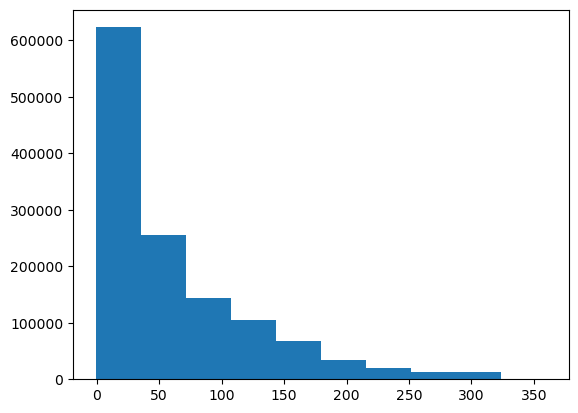

In [19]:
plt.hist(search_data['days_between_flights'])
plt.show()

# Total Flight Duration (for outbound):

In [20]:
departure_times_1 = [j.split(";") for j in search_data["departure_datetime_1"]]
arrival_times_1 = [j.split(";") for j in search_data["arrival_datetime_1"]]

# Number of connections (for outbound)

In [124]:
search_data["n_connections_outbd"] = [len(j.split(";"))-1 for j in search_data["departure_datetime_1"]]

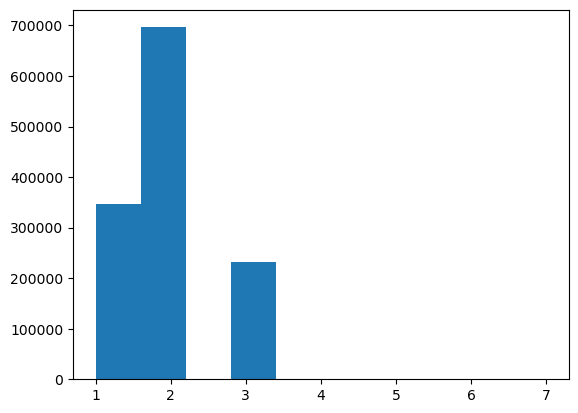

In [22]:
plt.hist(search_data["n_connections_outbd"])
plt.show()

# Total Flight Duration (for inbound):

In [23]:
search_data["departure_datetime_2"] = search_data["departure_datetime_2"].fillna(-1)
search_data["arrival_datetime_2"] = search_data["arrival_datetime_2"].fillna(-1)

In [24]:
departure_times_2 = [-1 if j == -1 else j.split(";") for j in search_data["departure_datetime_2"]]
arrival_times_2 = [-1 if j == -1 else j.split(";") for j in search_data["arrival_datetime_2"]]

In [25]:
def flightdur(dep, arr):
    durations = []
    for a, b in zip(dep, arr):
        dur_ = []
        if (a==-1 or b==-1):
            dur_.append(0)
        else:
            for aa, bb in zip(a, b):
                dur_.append((converttodtm(cleandatetime(bb)) - converttodtm(cleandatetime(aa))).seconds/60)
        durations.append(dur_)  
    return durations

In [26]:
durations_inbound = flightdur(departure_times_2, arrival_times_2)
durations_outbound = flightdur(departure_times_1, arrival_times_1)

In [27]:
search_data["mean_flight_time_outbound"] = [np.mean(j) for j in durations_outbound]
search_data["total_flight_time_outbound"] = [np.sum(j) for j in durations_outbound]
search_data["mean_flight_time_inbound"] = [np.mean(j) for j in durations_inbound]
search_data["total_flight_time_inbound"] = [np.sum(j) for j in durations_inbound]

# Number of connections (for inbound)

In [125]:
search_data["n_connections_inbd"] = [-1 if j == -1 else len(j.split(";"))-1 for j in search_data["departure_datetime_2"]]

In [29]:
len(search_data["n_connections_outbd"])

1277019

# Average waiting time

In [126]:
def getwaittime(dep, arr, connections):
    wait = []
    for p, q, r in zip(dep, arr, connections):
        waits = []
        if (p==-1 or q==-1 or r == 0):
            waits.append(0)
        else:
            for pp, qq in enumerate(q):
                if pp+1<len(p):
                    waits.append((converttodtm(cleandatetime(q[pp+1])) - converttodtm(cleandatetime(p[pp]))).seconds/60)
        wait.append(np.nanmean(waits))
    return wait

In [127]:
search_data["wait_time_outbnd"] = getwaittime(departure_times_1, arrival_times_1, search_data["n_connections_outbd"])
search_data["wait_time_inbnd"] = getwaittime(departure_times_2, arrival_times_2, search_data["n_connections_inbd"])

# Departure time class

In [32]:
def gettimeclass(times):
    if times == -1:
        timeclass = -1
    elif datetime.strptime("7:59", "%H:%M") > datetime.strptime(cleandatetime(times[0]).split("T")[1], "%H:%M:%S") > datetime.strptime("5:59", "%H:%M"):
        timeclass = "Early Morning"
    elif datetime.strptime("9:59", "%H:%M") > datetime.strptime(cleandatetime(times[0]).split("T")[1], "%H:%M:%S") > datetime.strptime("7:59", "%H:%M"):
        timeclass = "Mid Morning"
    elif datetime.strptime("11:59", "%H:%M") > datetime.strptime(cleandatetime(times[0]).split("T")[1], "%H:%M:%S") > datetime.strptime("9:59", "%H:%M"):
        timeclass = "Late Morning"
    elif datetime.strptime("16:59", "%H:%M") > datetime.strptime(cleandatetime(times[0]).split("T")[1], "%H:%M:%S") > datetime.strptime("11:59", "%H:%M"):
        timeclass = "Afternoon"
    elif datetime.strptime("20:59", "%H:%M") > datetime.strptime(cleandatetime(times[0]).split("T")[1], "%H:%M:%S") > datetime.strptime("16:59", "%H:%M"):
        timeclass = "Evening"
    elif datetime.strptime("23:59", "%H:%M") > datetime.strptime(cleandatetime(times[0]).split("T")[1], "%H:%M:%S") > datetime.strptime("20:59", "%H:%M"):
        timeclass = "Night"
    else:
        timeclass = "Late Night"
    return timeclass

In [33]:
search_data["outbounddeparturetimeclass"] = [gettimeclass(i) for i in departure_times_1]
search_data["inbounddeparturetimeclass"] = [gettimeclass(i) for i in departure_times_2]

In [34]:
search_data["carrier_2"] = search_data["carrier_2"].fillna("NA")

In [35]:
def checkmulticarrier(flightstring):
    """
    checking if more than one carrier type is involved
    """
    if flightstring == "NA":
        mult=-1
    else:
        flights = flightstring.split(";")
        flights = [i.strip() for i in flights]
        if len(flights)==1:
            mult = 1
        elif len(set(flights)) == 1:
            mult = 1
        else:
            mult = 2
    return mult

In [36]:
search_data["multicarrier_outbound"] = [checkmulticarrier(i) for i in search_data["carrier_1"]]
search_data["multicarrier_inbound"] = [checkmulticarrier(i) for i in search_data["carrier_2"]]

In [37]:
conversion = pd.read_csv("conversion.csv")

In [128]:
search_data_ = pd.merge(search_data, conversion, how="inner", on="currency")

In [129]:
pd.set_option('display.max_columns', None)
search_data_.head(10)

,search_id,search_time,currency,destination,search_user_id,language,origin,partner_id,passengers,pos,session_id,user_agent,num_requests,fare,supplier,cabin_class,carrier_1,carrier_2,flight_num_1,flight_num_2,departure_datetime_1,arrival_datetime_1,departure_datetime_2,arrival_datetime_2,itinerary_id,first_departure_datetime_1,days_between_flights,n_connections_outbd,mean_flight_time_outbound,total_flight_time_outbound,mean_flight_time_inbound,total_flight_time_inbound,n_connections_inbd,wait_time_outbnd,wait_time_inbnd,outbounddeparturetimeclass,inbounddeparturetimeclass,multicarrier_outbound,multicarrier_inbound,2022
0,02c6c2ad-325b-4155-bb03-89badc92ea84,2017-02-01 00:00:07,USD,MIA,NBYNv9utORVjlf604rUgXL/eFz6Tmu2NyygDWTFsM5OOWH...,en,LAX,294,1,US,292c32ab-9744-490f-911a-d3536e86847e,Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G920...,1,499.00,22,economy,AA,AA,AA1088,AA1147,2017-04-07T09:50:00-07:00,2017-04-07T17:56:00-04:00,2017-04-16T21:30:00-04:00,2017-04-17T00:33:00-07:00,294f363b-86f0-4e67-abe9-05221dadb8b8,2017-04-07 09:50:00,65,0,486.000000,486.0,183.000000,183.0,0,0.0,0.0,Mid Morning,Night,1,1,1.0
1,c8903983-3eb9-4f0f-8f87-64b7e5dd0692,2017-02-01 00:00:39,USD,SJD,36195bda-ec40-4907-9428-c4fe11bd87fa,en,LAX,91,1,US,e0ae1ecd-8715-4577-bca4-604cf3a58d0e,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG-SM-...,1,286.79,91,economy,AA,AA,AA237,AA237,2017-05-30T08:35:00,2017-05-30T11:58:00,2017-06-03T13:00:00,2017-06-03T14:36:00,c53826cf-1fba-42a6-a765-941628e1901e,2017-05-30 08:35:00,118,0,203.000000,203.0,96.000000,96.0,0,0.0,0.0,Mid Morning,Afternoon,1,1,1.0
2,b1d666c8-d570-47ec-bc46-26ee5332620f,2017-02-01 00:00:48,USD,LHR,36ba8a8c-8c47-4dc6-bd70-0b3ae071c8cf,en,PHX,91,2,US,1eb74ec2-e6d7-4423-a1e3-de2a411a4aed,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,1,507.46,91,economy,DL; DL,DL; DL,DL5852; DL4414,DL11; DL1516,2017-05-10T13:13:00; 2017-05-10T18:30:00,2017-05-10T14:45:00; 2017-05-11T12:55:00,2017-05-28T12:55:00; 2017-05-28T17:50:00,2017-05-28T16:05:00; 2017-05-28T19:11:00,37a44686-8347-4c72-8690-c9432349f9a6,2017-05-10 13:13:00,98,1,598.500000,1197.0,135.500000,271.0,1,1422.0,376.0,Afternoon,Afternoon,1,1,1.0
3,0abbfe4c-b72d-42c7-ae8a-966643e14600,2017-02-01 00:00:54,USD,LAX,025ee32b-2a0b-4987-b275-893f148ab259,en,CMH,91,1,US,262b200e-b183-48ab-b737-72c251ca0ff3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_1...,1,192.20,91,economy,AA,NA,AA659,NaN,2017-03-29T16:35:00,2017-03-29T18:53:00,-1,-1,2e3afcd8-7d56-4b49-a71b-f85c23e1b807,2017-03-29 16:35:00,56,0,138.000000,138.0,0.000000,0.0,-1,0.0,0.0,Afternoon,-1,1,-1,1.0
4,198f2d0f-4f30-418c-bf78-ccf776a63501,2017-02-01 00:01:02,USD,MCO,f69465d7-cdb2-4dd0-98ad-6362423a8dc3,en,EGE,91,1,US,97d78806-2f65-48af-9d21-e7f9bb6a667c,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,1,615.60,91,economy,UA; UA,UA; UA,UA4475; UA564,UA1191; UA1252,2017-02-10T07:52:00; 2017-02-10T11:00:00,2017-02-10T09:03:00; 2017-02-10T16:31:00,2017-02-13T08:47:00; 2017-02-13T11:40:00,2017-02-13T10:30:00; 2017-02-13T13:41:00,619b0f7c-825f-47b1-a191-300862feff80,2017-02-10 07:52:00,9,1,201.000000,402.0,112.000000,224.0,1,519.0,294.0,Early Morning,Mid Morning,1,1,1.0
5,03224bb7-924c-4044-9f4b-033c3850447d,2017-02-01 00:01:06,USD,NYC,e68fb852-92c5-4ec4-8d6d-3c1549c749f2,en,YTO,58,1,RU,098bf286-4f80-4981-a723-e8c063cb5910,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,10,150.04,148,Economy,DL; DL,NA,DL1822; DL5211,NaN,2017-02-16T06:10:00; 2017-02-16T08:37:00,2017-02-16T07:40:00; 2017-02-16T10:33:00,-1,-1,22b48ef5-4ff1-4356-86e8-4e37226d3bfb,2017-02-16 06:10:00,15,1,103.000000,206.0,0.000000,0.0,-1,263.0,0.0,Early Morning,-1,1,-1,1.0
6,bf0709c2-5775-48aa-952b-35f88430c431,2017-02-01 00:01:11,USD,PBI,7864485d-5c63-45ee-9e4d-a3c43e078b36,en,FLO,91,3,US,6619e1b4-7335-4ff3-9b9b-88bdc65ed715,Mozilla/5.0 (Linux; Android 6.0; RCT6513W87 Bu...,1,352.60,91,economy,AA; AA,AA; AA,AA4933; AA1846,AA539; AA4860,2017-05-26T05:25:00; 2017-05-26T07:40:00,2017-05-26T06:16:00; 2017-05-26T09:31:00,2017-05-28T08:25:00; 2017-05-28

In [130]:
search_data_.isnull().sum()

search_id                           0
search_time                         0
currency                            0
destination                         0
search_user_id                      0
language                            0
origin                              0
partner_id                          0
passengers                          0
pos                              5107
session_id                          0
user_agent                       8145
num_requests                        0
fare                                0
supplier                            0
cabin_class                         0
carrier_1                           0
carrier_2                           0
flight_num_1                        0
flight_num_2                   234381
departure_datetime_1                0
arrival_datetime_1                  0
departure_datetime_2                0
arrival_datetime_2                  0
itinerary_id                  1173909
first_departure_datetime_1          0
days_between

In [107]:
search_data_["currency_usd"] = [i/j for i, j in zip(search_data_["fare"], search_data_["2022"])]

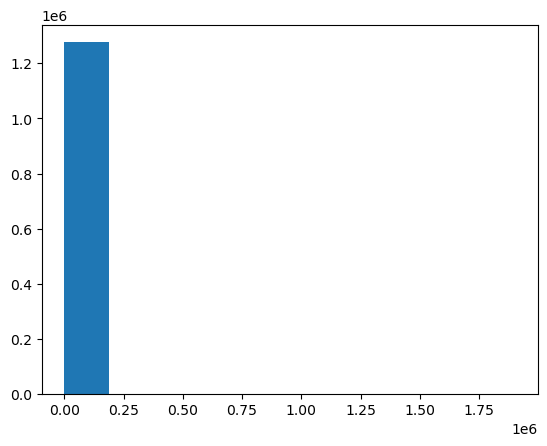

In [108]:
plt.hist(search_data_["currency_usd"])
plt.show()

In [109]:
search_data_.head()

,search_id,search_time,currency,destination,search_user_id,language,origin,partner_id,passengers,pos,session_id,user_agent,num_requests,fare,supplier,cabin_class,carrier_1,carrier_2,flight_num_1,flight_num_2,departure_datetime_1,arrival_datetime_1,departure_datetime_2,arrival_datetime_2,itinerary_id,first_departure_datetime_1,days_between_flights,n_connections_outbd,mean_flight_time_outbound,total_flight_time_outbound,mean_flight_time_inbound,total_flight_time_inbound,n_connections_inbd,wait_time_outbnd,wait_time_inbnd,outbounddeparturetimeclass,inbounddeparturetimeclass,multicarrier_outbound,multicarrier_inbound,2022,currency_usd
0,02c6c2ad-325b-4155-bb03-89badc92ea84,2017-02-01 00:00:07,USD,MIA,NBYNv9utORVjlf604rUgXL/eFz6Tmu2NyygDWTFsM5OOWH...,en,LAX,294,1,US,292c32ab-9744-490f-911a-d3536e86847e,Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G920...,1,499.00,22,economy,AA,AA,AA1088,AA1147,2017-04-07T09:50:00-07:00,2017-04-07T17:56:00-04:00,2017-04-16T21:30:00-04:00,2017-04-17T00:33:00-07:00,294f363b-86f0-4e67-abe9-05221dadb8b8,2017-04-07 09:50:00,65,1,486.0,486.0,183.0,183.0,1,NaN,NaN,Mid Morning,Night,1,1,1.0,499.00
1,c8903983-3eb9-4f0f-8f87-64b7e5dd0692,2017-02-01 00:00:39,USD,SJD,36195bda-ec40-4907-9428-c4fe11bd87fa,en,LAX,91,1,US,e0ae1ecd-8715-4577-bca4-604cf3a58d0e,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG-SM-...,1,286.79,91,economy,AA,AA,AA237,AA237,2017-05-30T08:35:00,2017-05-30T11:58:00,2017-06-03T13:00:00,2017-06-03T14:36:00,c53826cf-1fba-42a6-a765-941628e1901e,2017-05-30 08:35:00,118,1,203.0,203.0,96.0,96.0,1,NaN,NaN,Mid Morning,Afternoon,1,1,1.0,286.79
2,b1d666c8-d570-47ec-bc46-26ee5332620f,2017-02-01 00:00:48,USD,LHR,36ba8a8c-8c47-4dc6-bd70-0b3ae071c8cf,en,PHX,91,2,US,1eb74ec2-e6d7-4423-a1e3-de2a411a4aed,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,1,507.46,91,economy,DL; DL,DL; DL,DL5852; DL4414,DL11; DL1516,2017-05-10T13:13:00; 2017-05-10T18:30:00,2017-05-10T14:45:00; 2017-05-11T12:55:00,2017-05-28T12:55:00; 2017-05-28T17:50:00,2017-05-28T16:05:00; 2017-05-28T19:11:00,37a44686-8347-4c72-8690-c9432349f9a6,2017-05-10 13:13:00,98,2,598.5,1197.0,135.5,271.0,2,1422.0,376.0,Afternoon,Afternoon,1,1,1.0,507.46
3,0abbfe4c-b72d-42c7-ae8a-966643e14600,2017-02-01 00:00:54,USD,LAX,025ee32b-2a0b-4987-b275-893f148ab259,en,CMH,91,1,US,262b200e-b183-48ab-b737-72c251ca0ff3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_1...,1,192.20,91,economy,AA,NA,AA659,NaN,2017-03-29T16:35:00,2017-03-29T18:53:00,-1,-1,2e3afcd8-7d56-4b49-a71b-f85c23e1b807,2017-03-29 16:35:00,56,1,138.0,138.0,0.0,0.0,-1,NaN,0.0,Afternoon,-1,1,-1,1.0,192.20
4,198f2d0f-4f30-418c-bf78-ccf776a63501,2017-02-01 00:01:02,USD,MCO,f69465d7-cdb2-4dd0-98ad-6362423a8dc3,en,EGE,91,1,US,97d78806-2f65-48af-9d21-e7f9bb6a667c,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,1,615.60,91,economy,UA; UA,UA; UA,UA4475; UA564,UA1191; UA1252,2017-02-10T07:52:00; 2017-02-10T11:00:00,2017-02-10T09:03:00; 2017-02-10T16:31:00,2017-02-13T08:47:00; 2017-02-13T11:40:00,2017-02-13T10:30:00; 2017-02-13T13:41:00,619b0f7c-825f-47b1-a191-300862feff80,2017-02-10 07:52:00,9,2,201.0,402.0,112.0,224.0,2,519.0,294.0,Early Morning,Mid Morning,1,1,1.0,615.60


In [110]:
np.max(search_data_["currency_usd"])

1903162.0553359685

In [111]:
search_data_ = search_data_[search_data_["currency_usd"] < np.max(search_data_["currency_usd"])]

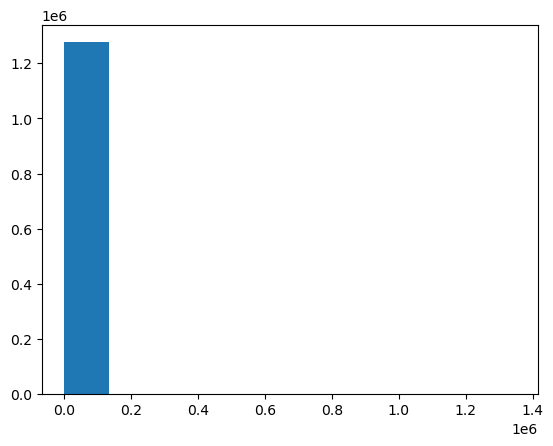

In [112]:
plt.hist(search_data_["currency_usd"])
plt.show()

In [113]:
np.max(search_data_["currency_usd"])

1347825.2190120763

In [114]:
search_data_[search_data_["currency_usd"] == np.max(search_data_["currency_usd"])]

,search_id,search_time,currency,destination,search_user_id,language,origin,partner_id,passengers,pos,session_id,user_agent,num_requests,fare,supplier,cabin_class,carrier_1,carrier_2,flight_num_1,flight_num_2,departure_datetime_1,arrival_datetime_1,departure_datetime_2,arrival_datetime_2,itinerary_id,first_departure_datetime_1,days_between_flights,n_connections_outbd,mean_flight_time_outbound,total_flight_time_outbound,mean_flight_time_inbound,total_flight_time_inbound,n_connections_inbd,wait_time_outbnd,wait_time_inbnd,outbounddeparturetimeclass,inbounddeparturetimeclass,multicarrier_outbound,multicarrier_inbound,2022,currency_usd
1214196,049f266d-37db-4309-9af3-36c790d5f776,2017-02-17 11:54:07,EUR,AKL,ceea0fcb-02ab-4bab-954c-1cc0bd7e3a67,fi,HEL,107,1,FI,a3160932-8b8c-428e-859f-41793bc6bd7f,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,15,1282825.0,118,economy,QR; QR,CX; CX; CX,QR302; QR920,CX198; CX293; CX1451,2017-09-04T17:50:00; 2017-09-05T03:01:00,2017-09-05T00:15:00; 2017-09-06T04:00:00,2017-09-18T13:45:00; 2017-09-19T00:40:00; 2017...,2017-09-18T21:00:00; 2017-09-19T07:25:00; 2017...,NaN,2017-09-04 17:50:00,199,2,222.0,444.0,368.333333,1105.0,3,610.0,982.5,Evening,Afternoon,1,1,0.951774,1.347825e+06


In [115]:
set(search_data_.cabin_class)

{'Business',
 'COACH',
 'ECONOMY',
 'Economy',
 'First',
 'First Class',
 'Premium Economy',
 'business',
 'economy',
 'first',
 'mixed',
 'premiumEconomy',
 'premium_economy'}

In [116]:
set(search_data_.carrier_1)

{'4U; AZ',
 '9W; BW; BW',
 'TB; FR',
 'WW; SN; AZ',
 'AC; LH; AI',
 'WW; SN',
 'SV; SV; MS',
 'SK; QS; QS',
 'EI; UA; UA',
 'SQ; GA',
 'WS; JL; JL',
 'SK; TG',
 'FI; UA; BB',
 'AY; AY; TZ',
 'TM; EY; EY',
 'HV; SK',
 'KL; KL; OU',
 'AM; AA; AA',
 'WS; KE; KE',
 'UP; UP; AA',
 'VS; VS; MN',
 'HV; XG',
 'EK; EK; SB',
 'NZ; UA; UA',
 'AB; 4U',
 'FI; LH; MI',
 'EY; AZ',
 'KL; KL; TK',
 'AA; AC; AC',
 'SK; SK; TF',
 'SK; SU',
 'DL; FJ; FJ',
 'WW; DY',
 'CX; CX; QF',
 'TG; TG; TG; TG',
 'FI; EN',
 'SQ; AA',
 'TO; U2',
 'HU; HU; PR',
 'J2',
 '2T; I5',
 'U2; U2; IB',
 'U2; DY',
 'E9',
 'AS; 3M',
 'BA; BA; EW',
 'AZ; BA; FI',
 'CZ; MF',
 'FI; DE',
 'WM; UA; UA',
 'LH; LH; LH; LH',
 'FR; FR; IB; IB',
 'VX; HA; HA',
 'EY; EY; GA',
 'WX; ET; ET',
 'CM; CM; LA',
 'EY; EY; AA',
 'VS; VS; AI',
 'WW; DL; DL',
 'NH; EW; LH',
 'LX; 4U; 4U',
 'LA; UX',
 'HV; SN; OU',
 'AY; PS; PS',
 'EY; TP',
 'VX; FI',
 'FZ; AF; AF',
 'CX; CX; AV',
 'GF; GF; GF',
 'UA; UA; A3',
 'OS; EW',
 'HA; CZ; CZ',
 'WW; SV',
 'DL;

In [117]:
set(search_data_.carrier_2)

{'TB; FR',
 'LA; LA; JQ',
 'SV; SV; MS',
 'VY; VY; ST',
 'EI; UA; UA',
 'SQ; GA',
 'SK; TG',
 'D7; Z2',
 'CX; QR; QR',
 'MS; LH; UA',
 'AM; AA; AA',
 'LG; KL; FI',
 'NZ; UA; UA',
 'AB; 4U',
 'FJ; SQ',
 'EY; AZ',
 'KL; KL; TK',
 'AA; AC; AC',
 'AZ; KM; FI',
 'DL; FJ; FJ',
 'WW; DY',
 'PR; PR; WS',
 'TG; TG; TG; TG',
 'BW; BW; WS',
 'WP; VX',
 'ZK; AS; AS',
 'TO; U2',
 '0B; OS',
 'J2',
 'HX; UA; UA',
 'TK; TK; G3',
 'VY; WX; WX',
 'U2; DY',
 'E9',
 'AS; 3M',
 'PC; WW',
 'AZ; BA; FI',
 'IB; LA; KL',
 'WM; UA; UA',
 'LH; LH; LH; LH',
 'VX; HA; HA',
 'SC; HU',
 'CI; CI; HA',
 'EY; EY; AA',
 'VS; VS; AI',
 'G3; AT; AT; AT',
 'LA; UX',
 'SN; LH; B6',
 'PG; SQ',
 'BA; NZ; VX',
 'CX; CX; HA',
 'EY; TP',
 'VX; FI',
 'FZ; AF; AF',
 'GF; GF; GF',
 'CX; CX; AV',
 'UA; UA; A3',
 'OS; EW',
 'DL; VA',
 'OK; AB',
 'P9; AM',
 'AT; KK',
 'DL; TB',
 'U2; CX',
 'AF; KL; KL',
 'NT; UX',
 'JL; MH',
 'DL; AI; AI',
 'HO; ET; ET',
 'EI; BM',
 'PY; LI',
 'UA; LX',
 'BW; BW; CM',
 'HX; AC; AC',
 'B6; LY',
 'SQ; K

In [118]:
le = preprocessing.LabelEncoder()

In [119]:
search_data_["carrier_1_code"] = le.fit_transform(search_data_.carrier_1)
search_data_["carrier_2_code"] = le.fit_transform(search_data_.carrier_2)
search_data_["cabin_class_code"] = le.fit_transform(search_data_.cabin_class)

In [120]:
search_data_.head()

,search_id,search_time,currency,destination,search_user_id,language,origin,partner_id,passengers,pos,session_id,user_agent,num_requests,fare,supplier,cabin_class,carrier_1,carrier_2,flight_num_1,flight_num_2,departure_datetime_1,arrival_datetime_1,departure_datetime_2,arrival_datetime_2,itinerary_id,first_departure_datetime_1,days_between_flights,n_connections_outbd,mean_flight_time_outbound,total_flight_time_outbound,mean_flight_time_inbound,total_flight_time_inbound,n_connections_inbd,wait_time_outbnd,wait_time_inbnd,outbounddeparturetimeclass,inbounddeparturetimeclass,multicarrier_outbound,multicarrier_inbound,2022,currency_usd,carrier_1_code,carrier_2_code,cabin_class_code
0,02c6c2ad-325b-4155-bb03-89badc92ea84,2017-02-01 00:00:07,USD,MIA,NBYNv9utORVjlf604rUgXL/eFz6Tmu2NyygDWTFsM5OOWH...,en,LAX,294,1,US,292c32ab-9744-490f-911a-d3536e86847e,Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G920...,1,499.00,22,economy,AA,AA,AA1088,AA1147,2017-04-07T09:50:00-07:00,2017-04-07T17:56:00-04:00,2017-04-16T21:30:00-04:00,2017-04-17T00:33:00-07:00,294f363b-86f0-4e67-abe9-05221dadb8b8,2017-04-07 09:50:00,65,1,486.0,486.0,183.0,183.0,1,NaN,NaN,Mid Morning,Night,1,1,1.0,499.00,561,552,8
1,c8903983-3eb9-4f0f-8f87-64b7e5dd0692,2017-02-01 00:00:39,USD,SJD,36195bda-ec40-4907-9428-c4fe11bd87fa,en,LAX,91,1,US,e0ae1ecd-8715-4577-bca4-604cf3a58d0e,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG-SM-...,1,286.79,91,economy,AA,AA,AA237,AA237,2017-05-30T08:35:00,2017-05-30T11:58:00,2017-06-03T13:00:00,2017-06-03T14:36:00,c53826cf-1fba-42a6-a765-941628e1901e,2017-05-30 08:35:00,118,1,203.0,203.0,96.0,96.0,1,NaN,NaN,Mid Morning,Afternoon,1,1,1.0,286.79,561,552,8
2,b1d666c8-d570-47ec-bc46-26ee5332620f,2017-02-01 00:00:48,USD,LHR,36ba8a8c-8c47-4dc6-bd70-0b3ae071c8cf,en,PHX,91,2,US,1eb74ec2-e6d7-4423-a1e3-de2a411a4aed,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,1,507.46,91,economy,DL; DL,DL; DL,DL5852; DL4414,DL11; DL1516,2017-05-10T13:13:00; 2017-05-10T18:30:00,2017-05-10T14:45:00; 2017-05-11T12:55:00,2017-05-28T12:55:00; 2017-05-28T17:50:00,2017-05-28T16:05:00; 2017-05-28T19:11:00,37a44686-8347-4c72-8690-c9432349f9a6,2017-05-10 13:13:00,98,2,598.5,1197.0,135.5,271.0,2,1422.0,376.0,Afternoon,Afternoon,1,1,1.0,507.46,4023,2925,8
3,0abbfe4c-b72d-42c7-ae8a-966643e14600,2017-02-01 00:00:54,USD,LAX,025ee32b-2a0b-4987-b275-893f148ab259,en,CMH,91,1,US,262b200e-b183-48ab-b737-72c251ca0ff3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_1...,1,192.20,91,economy,AA,NA,AA659,NaN,2017-03-29T16:35:00,2017-03-29T18:53:00,-1,-1,2e3afcd8-7d56-4b49-a71b-f85c23e1b807,2017-03-29 16:35:00,56,1,138.0,138.0,0.0,0.0,-1,NaN,0.0,Afternoon,-1,1,-1,1.0,192.20,561,5976,8
4,198f2d0f-4f30-418c-bf78-ccf776a63501,2017-02-01 00:01:02,USD,MCO,f69465d7-cdb2-4dd0-98ad-6362423a8dc3,en,EGE,91,1,US,97d78806-2f65-48af-9d21-e7f9bb6a667c,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,1,615.60,91,economy,UA; UA,UA; UA,UA4475; UA564,UA1191; UA1252,2017-02-10T07:52:00; 2017-02-10T11:00:00,2017-02-10T09:03:00; 2017-02-10T16:31:00,2017-02-13T08:47:00; 2017-02-13T11:40:00,2017-02-13T10:30:00; 2017-02-13T13:41:00,619b0f7c-825f-47b1-a191-300862feff80,2017-02-10 07:52:00,9,2,201.0,402.0,112.0,224.0,2,519.0,294.0,Early Morning,Mid Morning,1,1,1.0,615.60,10959,8324,8


In [121]:
search_data_.columns

Index(['search_id', 'search_time', 'currency', 'destination', 'search_user_id',
       'language', 'origin', 'partner_id', 'passengers', 'pos', 'session_id',
       'user_agent', 'num_requests', 'fare', 'supplier', 'cabin_class',
       'carrier_1', 'carrier_2', 'flight_num_1', 'flight_num_2',
       'departure_datetime_1', 'arrival_datetime_1', 'departure_datetime_2',
       'arrival_datetime_2', 'itinerary_id', 'first_departure_datetime_1',
       'days_between_flights', 'n_connections_outbd',
       'mean_flight_time_outbound', 'total_flight_time_outbound',
       'mean_flight_time_inbound', 'total_flight_time_inbound',
       'n_connections_inbd', 'wait_time_outbnd', 'wait_time_inbnd',
       'outbounddeparturetimeclass', 'inbounddeparturetimeclass',
       'multicarrier_outbound', 'multicarrier_inbound', '2022', 'currency_usd',
       'carrier_1_code', 'carrier_2_code', 'cabin_class_code'],
      dtype='object')

In [131]:
search_data_["returning_flight"] = [0 if i == -1 else 1 for i in search_data_.departure_datetime_2]

In [132]:
search_data_.isnull().sum()

search_id                           0
search_time                         0
currency                            0
destination                         0
search_user_id                      0
language                            0
origin                              0
partner_id                          0
passengers                          0
pos                              5107
session_id                          0
user_agent                       8145
num_requests                        0
fare                                0
supplier                            0
cabin_class                         0
carrier_1                           0
carrier_2                           0
flight_num_1                        0
flight_num_2                   234381
departure_datetime_1                0
arrival_datetime_1                  0
departure_datetime_2                0
arrival_datetime_2                  0
itinerary_id                  1173909
first_departure_datetime_1          0
days_between

In [134]:
search_data_.columns

Index(['search_id', 'search_time', 'currency', 'destination', 'search_user_id',
       'language', 'origin', 'partner_id', 'passengers', 'pos', 'session_id',
       'user_agent', 'num_requests', 'fare', 'supplier', 'cabin_class',
       'carrier_1', 'carrier_2', 'flight_num_1', 'flight_num_2',
       'departure_datetime_1', 'arrival_datetime_1', 'departure_datetime_2',
       'arrival_datetime_2', 'itinerary_id', 'first_departure_datetime_1',
       'days_between_flights', 'n_connections_outbd',
       'mean_flight_time_outbound', 'total_flight_time_outbound',
       'mean_flight_time_inbound', 'total_flight_time_inbound',
       'n_connections_inbd', 'wait_time_outbnd', 'wait_time_inbnd',
       'outbounddeparturetimeclass', 'inbounddeparturetimeclass',
       'multicarrier_outbound', 'multicarrier_inbound', '2022',
       'returning_flight'],
      dtype='object')

In [135]:
len(search_data_)

1277019

In [203]:
search_data_ = search_data_[(~search_data_['origin'].isin(duplicate_iata)) | (~search_data_['destination'].isin(duplicate_iata))]

In [204]:
len(search_data_)

1277019

In [209]:
airport_data_ = airport_data.groupby(["iata_code", "country"]).first().reset_index()   

In [211]:
duplicate_iata = list(set(airport_data_[airport_data_['iata_code'].duplicated(keep=False)]))

In [153]:
search_data_.head(10)

,search_id,search_time,currency,destination,search_user_id,language,origin,partner_id,passengers,pos,session_id,user_agent,num_requests,fare,supplier,cabin_class,carrier_1,carrier_2,flight_num_1,flight_num_2,departure_datetime_1,arrival_datetime_1,departure_datetime_2,arrival_datetime_2,itinerary_id,first_departure_datetime_1,days_between_flights,n_connections_outbd,mean_flight_time_outbound,total_flight_time_outbound,mean_flight_time_inbound,total_flight_time_inbound,n_connections_inbd,wait_time_outbnd,wait_time_inbnd,outbounddeparturetimeclass,inbounddeparturetimeclass,multicarrier_outbound,multicarrier_inbound,2022,returning_flight,origincity,origincountry,destinationcity,destinationcountry
0,02c6c2ad-325b-4155-bb03-89badc92ea84,2017-02-01 00:00:07,USD,MIA,NBYNv9utORVjlf604rUgXL/eFz6Tmu2NyygDWTFsM5OOWH...,en,LAX,294,1,US,292c32ab-9744-490f-911a-d3536e86847e,Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G920...,1,499.00,22,economy,AA,AA,AA1088,AA1147,2017-04-07T09:50:00-07:00,2017-04-07T17:56:00-04:00,2017-04-16T21:30:00-04:00,2017-04-17T00:33:00-07:00,294f363b-86f0-4e67-abe9-05221dadb8b8,2017-04-07 09:50:00,65,0,486.000000,486.0,183.000000,183.0,0,0.0,0.0,Mid Morning,Night,1,1,1.0,1,-1,-1,-1,-1
1,c8903983-3eb9-4f0f-8f87-64b7e5dd0692,2017-02-01 00:00:39,USD,SJD,36195bda-ec40-4907-9428-c4fe11bd87fa,en,LAX,91,1,US,e0ae1ecd-8715-4577-bca4-604cf3a58d0e,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG-SM-...,1,286.79,91,economy,AA,AA,AA237,AA237,2017-05-30T08:35:00,2017-05-30T11:58:00,2017-06-03T13:00:00,2017-06-03T14:36:00,c53826cf-1fba-42a6-a765-941628e1901e,2017-05-30 08:35:00,118,0,203.000000,203.0,96.000000,96.0,0,0.0,0.0,Mid Morning,Afternoon,1,1,1.0,1,-1,-1,-1,-1
2,b1d666c8-d570-47ec-bc46-26ee5332620f,2017-02-01 00:00:48,USD,LHR,36ba8a8c-8c47-4dc6-bd70-0b3ae071c8cf,en,PHX,91,2,US,1eb74ec2-e6d7-4423-a1e3-de2a411a4aed,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,1,507.46,91,economy,DL; DL,DL; DL,DL5852; DL4414,DL11; DL1516,2017-05-10T13:13:00; 2017-05-10T18:30:00,2017-05-10T14:45:00; 2017-05-11T12:55:00,2017-05-28T12:55:00; 2017-05-28T17:50:00,2017-05-28T16:05:00; 2017-05-28T19:11:00,37a44686-8347-4c72-8690-c9432349f9a6,2017-05-10 13:13:00,98,1,598.500000,1197.0,135.500000,271.0,1,1422.0,376.0,Afternoon,Afternoon,1,1,1.0,1,-1,-1,-1,-1
3,0abbfe4c-b72d-42c7-ae8a-966643e14600,2017-02-01 00:00:54,USD,LAX,025ee32b-2a0b-4987-b275-893f148ab259,en,CMH,91,1,US,262b200e-b183-48ab-b737-72c251ca0ff3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_1...,1,192.20,91,economy,AA,NA,AA659,NaN,2017-03-29T16:35:00,2017-03-29T18:53:00,-1,-1,2e3afcd8-7d56-4b49-a71b-f85c23e1b807,2017-03-29 16:35:00,56,0,138.000000,138.0,0.000000,0.0,-1,0.0,0.0,Afternoon,-1,1,-1,1.0,0,-1,-1,-1,-1
4,198f2d0f-4f30-418c-bf78-ccf776a63501,2017-02-01 00:01:02,USD,MCO,f69465d7-cdb2-4dd0-98ad-6362423a8dc3,en,EGE,91,1,US,97d78806-2f65-48af-9d21-e7f9bb6a667c,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,1,615.60,91,economy,UA; UA,UA; UA,UA4475; UA564,UA1191; UA1252,2017-02-10T07:52:00; 2017-02-10T11:00:00,2017-02-10T09:03:00; 2017-02-10T16:31:00,2017-02-13T08:47:00; 2017-02-13T11:40:00,2017-02-13T10:30:00; 2017-02-13T13:41:00,619b0f7c-825f-47b1-a191-300862feff80,2017-02-10 07:52:00,9,1,201.000000,402.0,112.000000,224.0,1,519.0,294.0,Early Morning,Mid Morning,1,1,1.0,1,-1,-1,-1,-1
5,03224bb7-924c-4044-9f4b-033c3850447d,2017-02-01 00:01:06,USD,NYC,e68fb852-92c5-4ec4-8d6d-3c1549c749f2,en,YTO,58,1,RU,098bf286-4f80-4981-a723-e8c063cb5910,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,10,150.04,148,Economy,DL; DL,NA,DL1822; DL5211,NaN,2017-02-16T06:10:00; 2017-02-16T08:37:00,2017-02-16T07:40:00; 2017-02-16T10:33:00,-1,-1,22b48ef5-4ff1-4356-86e8-4e37226d3bfb,2017-02-16 06:10:00,15,1,103.000000,206.0,0.000000,0.0,-1,263.0,0.0,Early Morning,-1,1,-1,1.0,0,-1,-1,-1,-1
6,bf0709c2-5775-48aa-952b-35f88430c431,2017-02-01 00:01:11,USD,PBI,7864485d-5c63-45ee-9e4d-a3c43e078b36,en,FLO,91,3,US,6619e1b4-7335-4ff3-9b9b-88bdc65ed715,Mozilla/5.0 (Linux; Android 6.0; RCT6513W87 Bu...,1,352.60,91,eco

In [ ]:
featurestouse = []

In [133]:
search_data_.to_csv("search-features.csv", index = None)